# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

## Answer : 
### Framingham Heart Study Analysis 
#### Who(Audience)
- Healthcare Professionals : 
    Analyze key cardiovascular risk factors such as cholesterol levels, BMI, smoking, and hypertension.  
- Medical Researchers :
    Study long-term health trends to refine cardiovascular risk prediction models. Identify patterns in lifestyle factors and their correlation with heart disease.  
- Health-Conscious Individuals :
    Understand how personal lifestyle choices, such as diet, physical activity, and smoking, influence heart disease risk.  
#### What 
The Framingham dataset highlights major risk factors for cardiovascular disease (CVD), including high blood pressure, elevated cholesterol levels, smoking, diabetes, and body mass index (BMI).
Lifestyle choices, such as smoking and obesity, can greatly elevate the risk of heart disease, while adopting preventive measures—like maintaining a healthy BMI and managing blood pressure—can significantly lower it.
#### How (Visualization)
Comparative bar charts or scatter plots to show the relationship between key risk factors (e.g., cholesterol vs. heart disease incidence).
A timeline visualization to illustrate how heart disease risk has changed over decades.

# 3. Homework - work with your own data

In [46]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [47]:
#Load dataset
df = pd.read_csv("frmgham2.csv")
#df = pd.read_csv("/Users/vipul/Documents/pallavi_documents/courses/BU-MS Data Science/Mod B 01 - AI/Datasets/Healthcare/heart_framingham/FRAMINGHAM_teaching_2021a/csv/frmgham2.csv")

In [48]:


#Summarize the datasets using info() and describe()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1.162700e+04,11627.000000,11218.000000,11627.000000,11627.000000,11627.000000,11627.000000,11548.000000,11575.000000,11627.000000,...,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000
mean,5.004741e+06,1.568074,241.162418,54.792810,136.324116,83.037757,0.432528,8.250346,25.877349,0.045584,...,0.249333,0.743270,7241.556893,7593.846736,7543.036725,7008.153608,7660.880021,7166.082996,7854.102950,3598.956395
std,2.900877e+06,0.495366,45.368030,9.564299,22.798625,11.660144,0.495448,12.186888,4.102640,0.208589,...,0.432646,0.436848,2477.780010,2136.730285,2192.120311,2641.344513,2011.077091,2541.668477,1788.369623,3464.164659
min,2.448000e+03,1.000000,107.000000,32.000000,83.500000,30.000000,0.000000,0.000000,14.430000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000
25%,2.474378e+06,1.000000,210.000000,48.000000,120.000000,75.000000,0.000000,0.000000,23.095000,0.000000,...,0.000000,0.000000,6224.000000,7212.000000,7049.500000,5598.500000,7295.000000,6004.000000,7797.500000,0.000000
50%,5.006008e+06,2.000000,238.000000,54.000000,132.000000,82.000000,0.000000,0.000000,25.480000,0.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2429.000000
75%,7.472730e+06,2.000000,268.000000,62.000000,149.000000,90.000000,1.000000,20.000000,28.070000,0.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7329.000000
max,9.999312e+06,2.000000,696.000000,81.000000,295.000000,150.000000,1.000000,90.000000,56.800000,1.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [49]:
# Are there any duplicate rows?
duplicates = df[df.duplicated(keep=False)]
print("Duplicate rows#\n ",duplicates) # no rows are duplicate
# Are there any duplicate values in a given column (when this would be inappropriate?)
duplicate_PatientID = df[df.duplicated(subset='RANDID',keep=False)]
print("\nDuplicate RANDID #\n\n",duplicate_PatientID)

Duplicate rows#
  Empty DataFrame
Columns: [RANDID, SEX, TOTCHOL, AGE, SYSBP, DIABP, CURSMOKE, CIGPDAY, BMI, DIABETES, BPMEDS, HEARTRTE, GLUCOSE, educ, PREVCHD, PREVAP, PREVMI, PREVSTRK, PREVHYP, TIME, PERIOD, HDLC, LDLC, DEATH, ANGINA, HOSPMI, MI_FCHD, ANYCHD, STROKE, CVD, HYPERTEN, TIMEAP, TIMEMI, TIMEMIFC, TIMECHD, TIMESTRK, TIMECVD, TIMEDTH, TIMEHYP]
Index: []

[0 rows x 39 columns]

Duplicate RANDID #

         RANDID  SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY    BMI  \
0         2448    1    195.0   39  106.0   70.0         0      0.0  26.97   
1         2448    1    209.0   52  121.0   66.0         0      0.0    NaN   
2         6238    2    250.0   46  121.0   81.0         0      0.0  28.73   
3         6238    2    260.0   52  105.0   69.5         0      0.0  29.43   
4         6238    2    237.0   58  108.0   66.0         0      0.0  28.50   
...        ...  ...      ...  ...    ...    ...       ...      ...    ...   
11622  9998212    1    173.0   46  126.0   82.0  

In [50]:
# What are the mean, median, and mode of each column?
# Compute mean, median, and mode for numerical columns
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode(numeric_only=True).iloc[0]  # mode() may return multiple values; take the first

# Display results
summary = pd.DataFrame({'Mean': mean_values, 'Median': median_values, 'Mode': mode_values})
print(summary)

                  Mean      Median     Mode
RANDID    5.004741e+06  5006008.00  6238.00
SEX       1.568074e+00        2.00     2.00
TOTCHOL   2.411624e+02      238.00   240.00
AGE       5.479281e+01       54.00    52.00
SYSBP     1.363241e+02      132.00   120.00
DIABP     8.303776e+01       82.00    80.00
CURSMOKE  4.325277e-01        0.00     0.00
CIGPDAY   8.250346e+00        0.00     0.00
BMI       2.587735e+01       25.48    23.48
DIABETES  4.558356e-02        0.00     0.00
BPMEDS    8.555374e-02        0.00     0.00
HEARTRTE  7.678152e+01       75.00    75.00
GLUCOSE   8.412487e+01       80.00    77.00
educ      1.990205e+00        2.00     1.00
PREVCHD   7.241765e-02        0.00     0.00
PREVAP    5.392621e-02        0.00     0.00
PREVMI    3.216651e-02        0.00     0.00
PREVSTRK  1.307302e-02        0.00     0.00
PREVHYP   4.596199e-01        0.00     0.00
TIME      1.957019e+03     2156.00     0.00
PERIOD    1.899286e+00        2.00     1.00
HDLC      4.936472e+01       48.

In [51]:
# Are there any missing or null values?
missing_values = df.isnull().sum()
print(missing_values)

RANDID         0
SEX            0
TOTCHOL      409
AGE            0
SYSBP          0
DIABP          0
CURSMOKE       0
CIGPDAY       79
BMI           52
DIABETES       0
BPMEDS       593
HEARTRTE       6
GLUCOSE     1440
educ         295
PREVCHD        0
PREVAP         0
PREVMI         0
PREVSTRK       0
PREVHYP        0
TIME           0
PERIOD         0
HDLC        8600
LDLC        8601
DEATH          0
ANGINA         0
HOSPMI         0
MI_FCHD        0
ANYCHD         0
STROKE         0
CVD            0
HYPERTEN       0
TIMEAP         0
TIMEMI         0
TIMEMIFC       0
TIMECHD        0
TIMESTRK       0
TIMECVD        0
TIMEDTH        0
TIMEHYP        0
dtype: int64


In [52]:
    # Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?
df = df.drop(["HDLC", "LDLC"], axis=1) # Drop columns with missing values

df.fillna(df.mean(), inplace=True)
print(df.isnull().sum().sum())  # Should print 0 if all missing values are handled

0


In [53]:
# Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)
print("SEX: ",df['SEX'].unique())  # Should be only [1, 2] 
print("SMOKE: ",df['CURSMOKE'].unique()) # Should be [0, 1] (Non-smoker, Smoker)
print("Invalid Age", df[df['AGE'] < 0].value_counts()) # Check zero age values


SEX:  [1 2]
SMOKE:  [0 1]
Invalid Age Series([], Name: count, dtype: int64)


In [54]:
# Encode any categorical variables (e.g. with one-hot encoding.)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object','category']).columns
print(categorical_columns)

print("There are no categorical columns in the dataset so no need to encode them")

# Just for reference code to encode categorical columns
#df_encoded = pd.get_dummies(df)
#df_encoded

Index([], dtype='object')
There are no categorical columns in the dataset so no need to encode them


In [59]:
print ("Conclusion:") 
print("\n1. There are no duplicate rows in the dataset.")
print("\n2. The Framingham study collects data over multiple examination periods. The RANDID column is a unique identifier for each participant in the study. It is expected that the same RANDID will appear multiple times in the dataset.")
print("\n3. The mean, median, and mode of each column are calculated and displayed in a summary table.")
print("\n4. There are no missing values in the dataset after filling the missing values with mean values")
print("\n5. There are no categorical columns in the dataset so no need to encode them.")
# There are no categorical columns in the dataset so no need to encode them. Dropped the HDLC & LDLC columns as they have more missing values and for the remaining columns with missing values filled with mean values.


Conclusion:

1. There are no duplicate rows in the dataset.

2. The Framingham study collects data over multiple examination periods. The RANDID column is a unique identifier for each participant in the study. It is expected that the same RANDID will appear multiple times in the dataset.

3. The mean, median, and mode of each column are calculated and displayed in a summary table.

4. There are no missing values in the dataset after filling the missing values with mean values

5. There are no categorical columns in the dataset so no need to encode them.


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.


Page 4# Figure 0.2 Ticket Trend 



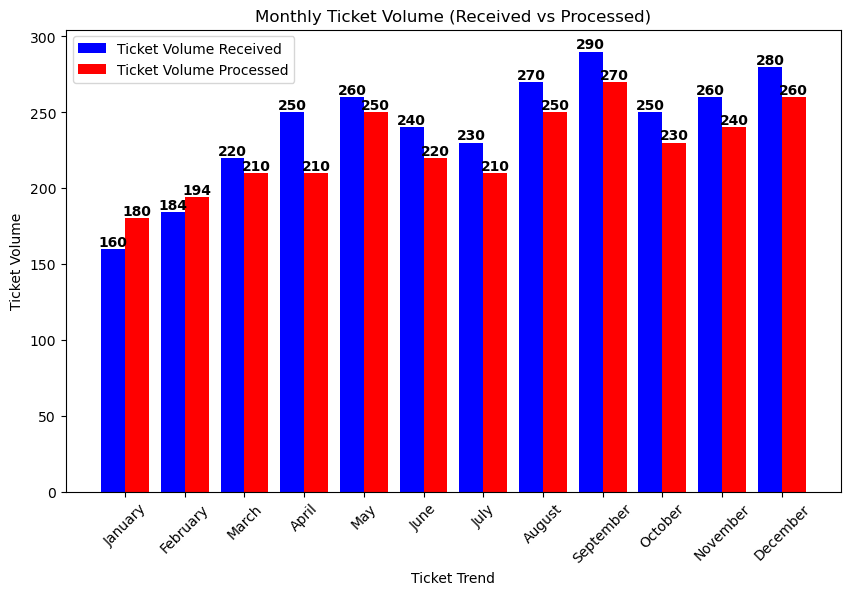

In [56]:
print("\nPage 4# Figure 0.2 Ticket Trend \n")

import numpy as np
import matplotlib.pyplot as plt

# Define months (X-axis)
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

# Sample Y-axis values
ticket_volume_received = [160, 184, 220, 250, 260, 240, 230, 270, 290, 250, 260, 280]
ticket_volume_processed = [180, 194, 210, 210, 250, 220, 210, 250, 270, 230, 240, 260]

# Set width for bars
bar_width = 0.4  

# X positions for bars
x = np.arange(len(months))

# Create the bar chart
plt.figure(figsize=(10, 6))
bar1 = plt.bar(x, ticket_volume_received, width=bar_width, label='Ticket Volume Received', color='blue')
bar2 = plt.bar(x + bar_width, ticket_volume_processed, width=bar_width, label='Ticket Volume Processed', color='red')

# Add value labels on top of bars
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Set labels and title
plt.xlabel('Ticket Trend')
plt.ylabel('Ticket Volume')
plt.title('Monthly Ticket Volume (Received vs Processed)')
plt.xticks(x + bar_width / 2, months, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(np.arange(0, 301, 50))  # Set Y-axis range from 0 to 300 with 50 intervals

# Add legend
plt.legend()

# Display the chart
plt.show()
